# Creating and Drawing a Network

In [1]:
# Install the library networkx for network analysis
!pip install networkx

In [2]:
# Load the libraries
import networkx
import pandas as pd
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt

In [3]:
# Load the data of the network of A Song of Ice and Fire
# The dataset was created by Andrew Beveridge (https://github.com/mathbeveridge/asoiaf/tree/master)
asoiaf_df = pd.read_csv('Data/asoiaf-book1-edges.csv')
asoiaf_df

Source              Target        Type  weight  \
0                     Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                     Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                  Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                  Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4    Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   
..                               ...                 ...         ...     ...   
679                 Tyrion-Lannister         Willis-Wode  Undirected       4   
680                 Tyrion-Lannister               Yoren  Undirected      10   
681                  Tywin-Lannister               Varys  Undirected       4   
682                  Tywin-Lannister         Walder-Frey  Undirected       8   
683                     Waymar-Royce     Will-(prologue)  Undirected      18   

     book  
0       1  
1       1  
2       1  
3       1  
4       1  
..    ...  
679     1  
680     1  
681     1  
682     1  
683     1  

[684 rows x 5 columns]

These networks were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books in <i>A Song of Ice and Fire</i>. The edge weight corresponds to the number of interactions. For example, the following sentence counts as an “edge” or connection between Jon Snow and Sam Tarly:<br><i>“It was the bastard <b>Jon Snow</b> who had taken that from him, him and his fat friend <b>Sam Tarly</b>.”</i>

In [4]:
# Create a Network from a Pandas dataframe
G = networkx.from_pandas_edgelist(asoiaf_df, 'Source', 'Target', 'weight')
G['Jon-Snow']

AtlasView({'Aemon-Targaryen-(Maester-Aemon)': {'weight': 34}, 'Albett': {'weight': 5}, 'Alliser-Thorne': {'weight': 32}, 'Arya-Stark': {'weight': 37}, 'Benjen-Stark': {'weight': 41}, 'Bowen-Marsh': {'weight': 10}, 'Bran-Stark': {'weight': 56}, 'Catelyn-Stark': {'weight': 14}, 'Cersei-Lannister': {'weight': 4}, 'Chett': {'weight': 4}, 'Dareon': {'weight': 6}, 'Donal-Noye': {'weight': 7}, 'Dywen': {'weight': 4}, 'Eddard-Stark': {'weight': 38}, 'Grenn': {'weight': 31}, 'Halder': {'weight': 23}, 'Hobb': {'weight': 5}, 'Jaremy-Rykker': {'weight': 7}, 'Jeor-Mormont': {'weight': 81}, 'Joffrey-Baratheon': {'weight': 10}, 'Jory-Cassel': {'weight': 3}, 'Luwin': {'weight': 10}, 'Matthar': {'weight': 3}, 'Mordane': {'weight': 4}, 'Othor': {'weight': 5}, 'Pypar': {'weight': 45}, 'Rast': {'weight': 8}, 'Rickon-Stark': {'weight': 11}, 'Robb-Stark': {'weight': 53}, 'Robert-Baratheon': {'weight': 18}, 'Rodrik-Cassel': {'weight': 3}, 'Samwell-Tarly': {'weight': 81}, 'Sansa-Stark': {'weight': 8}, 'Theon-

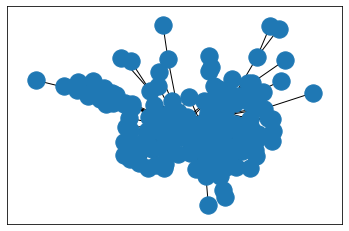

In [5]:
# Draw a simple network
networkx.draw_networkx(G, with_labels=False)

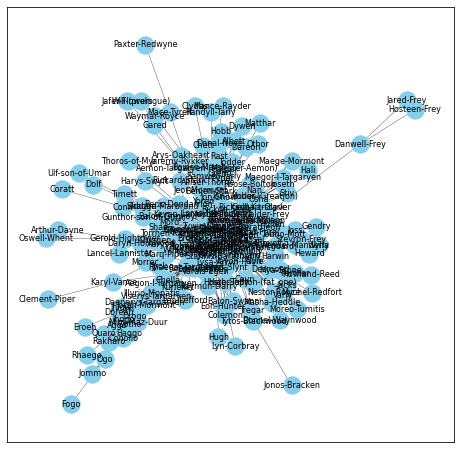

In [6]:
# Add labels and customize width, font, and figure size
plt.figure(figsize=(8,8))
networkx.draw_networkx(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

# Calculate Degree and Weighted Degree

Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has).

In [7]:
networkx.degree(G)

DegreeView({'Addam-Marbrand': 2, 'Jaime-Lannister': 29, 'Tywin-Lannister': 22, 'Aegon-I-Targaryen': 2, 'Daenerys-Targaryen': 21, 'Eddard-Stark': 66, 'Aemon-Targaryen-(Maester-Aemon)': 7, 'Alliser-Thorne': 10, 'Bowen-Marsh': 5, 'Chett': 3, 'Clydas': 1, 'Jeor-Mormont': 13, 'Jon-Snow': 37, 'Samwell-Tarly': 12, 'Aerys-II-Targaryen': 6, 'Brandon-Stark': 6, 'Gerold-Hightower': 5, 'Jon-Arryn': 15, 'Robert-Baratheon': 50, 'Aggo': 6, 'Drogo': 19, 'Jhogo': 6, 'Jorah-Mormont': 13, 'Quaro': 5, 'Rakharo': 5, 'Albett': 3, 'Halder': 8, 'Rast': 6, 'Grenn': 7, 'Pypar': 7, 'Tyrion-Lannister': 46, 'Alyn': 5, 'Harwin': 4, 'Jory-Cassel': 21, 'Tomard': 7, 'Arthur-Dayne': 1, 'Arya-Stark': 27, 'Benjen-Stark': 14, 'Bran-Stark': 32, 'Catelyn-Stark': 43, 'Cersei-Lannister': 30, 'Desmond': 2, 'Ilyn-Payne': 9, 'Jeyne-Poole': 6, 'Joffrey-Baratheon': 30, 'Meryn-Trant': 9, 'Mordane': 11, 'Mycah': 5, 'Myrcella-Baratheon': 7, 'Petyr-Baelish': 26, 'Rickon-Stark': 9, 'Robb-Stark': 35, 'Rodrik-Cassel': 18, 'Sandor-Clegane

In [8]:
# Make the degree values a dictionary, then add it as a network attribute
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [9]:
# Make a Pandas dataframe from the degree data, then sort from highest to lowest
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

node  degree
5                       Eddard-Stark      66
18                  Robert-Baratheon      50
30                  Tyrion-Lannister      46
39                     Catelyn-Stark      43
12                          Jon-Snow      37
51                        Robb-Stark      35
54                       Sansa-Stark      35
38                        Bran-Stark      32
40                  Cersei-Lannister      30
44                 Joffrey-Baratheon      30
1                    Jaime-Lannister      29
36                        Arya-Stark      27
49                     Petyr-Baelish      26
2                    Tywin-Lannister      22
4                 Daenerys-Targaryen      21
33                       Jory-Cassel      21
20                             Drogo      19
52                     Rodrik-Cassel      18
62                   Renly-Baratheon      18
68                             Luwin      18
66                             Varys      17
53                    Sandor-Clegane      16
70                     Theon-Greyjoy      15
17                         Jon-Arryn      15
97                        Lysa-Arryn      15
74                      Loras-Tyrell      14
37                      Benjen-Stark      14
63                   Barristan-Selmy      14
65                           Pycelle      14
11                      Jeor-Mormont      13
22                     Jorah-Mormont      13
114                Stannis-Baratheon      12
73                    Gregor-Clegane      12
13                     Samwell-Tarly      12
95                      Edmure-Tully      11
94                     Brynden-Tully      11
46                           Mordane      11
7                     Alliser-Thorne      10
87                             Bronn      10
83                  Rickard-Karstark      10
42                        Ilyn-Payne       9
45                       Meryn-Trant       9
50                      Rickon-Stark       9
103             Jon-Umber-(Greatjon)       8
130                Viserys-Targaryen       8
126                             Irri       8
26                            Halder       8
56                  Tommen-Baratheon       8
113                      Janos-Slynt       7
120                            Qotho       7
6    Aemon-Targaryen-(Maester-Aemon)       7
99                       Walder-Frey       7
58                             Yoren       7
28                             Grenn       7
34                            Tomard       7
129                Rhaegar-Targaryen       7
48                Myrcella-Baratheon       7
29                             Pypar       7
91                            Shagga       6
79                            Hullen       6
128                   Mirri-Maz-Duur       6
92                       Vardis-Egen       6
72                  Beric-Dondarrion       6
143                   Galbart-Glover       6
123                           Doreah       6
119                            Haggo       6
93                       Willis-Wode       6
125                  Illyrio-Mopatis       6
43                       Jeyne-Poole       6
14                Aerys-II-Targaryen       6
15                     Brandon-Stark       6
19                              Aggo       6
21                             Jhogo       6
27                              Rast       6
127                           Jhiqui       5
8                        Bowen-Marsh       5
16                  Gerold-Hightower       5
23                             Quaro       5
24                           Rakharo       5
64                      Boros-Blount       5
31                              Alyn       5
149                       Marq-Piper       5
89                         Marillion       5
96                      Hoster-Tully       5
47                             Mycah       5
57                       Vayon-Poole       5
77                     Hallis-Mollen       5
158                     Roose-Bolton       5
155                      Wy

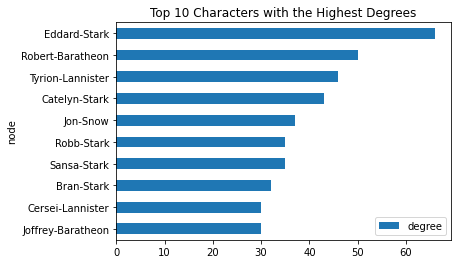

In [10]:
# Plot the 10 nodes with the highest degree values
degree_df[:10].plot(kind='barh', x='node', title='Top 10 Characters with the Highest Degrees').invert_yaxis()

Weighted degree centrality is defined as the summation of the weights of all links incident upon a node (i.e., the summation of weights of all ties that a node has).

In [11]:
networkx.degree(G, weight='weight')

DegreeView({'Addam-Marbrand': 9, 'Jaime-Lannister': 241, 'Tywin-Lannister': 181, 'Aegon-I-Targaryen': 9, 'Daenerys-Targaryen': 443, 'Eddard-Stark': 1284, 'Aemon-Targaryen-(Maester-Aemon)': 74, 'Alliser-Thorne': 80, 'Bowen-Marsh': 28, 'Chett': 19, 'Clydas': 5, 'Jeor-Mormont': 181, 'Jon-Snow': 784, 'Samwell-Tarly': 148, 'Aerys-II-Targaryen': 37, 'Brandon-Stark': 41, 'Gerold-Hightower': 17, 'Jon-Arryn': 169, 'Robert-Baratheon': 941, 'Aggo': 36, 'Drogo': 256, 'Jhogo': 43, 'Jorah-Mormont': 154, 'Quaro': 21, 'Rakharo': 24, 'Albett': 11, 'Halder': 56, 'Rast': 26, 'Grenn': 85, 'Pypar': 107, 'Tyrion-Lannister': 650, 'Alyn': 32, 'Harwin': 18, 'Jory-Cassel': 152, 'Tomard': 42, 'Arthur-Dayne': 4, 'Arya-Stark': 430, 'Benjen-Stark': 104, 'Bran-Stark': 531, 'Catelyn-Stark': 520, 'Cersei-Lannister': 424, 'Desmond': 7, 'Ilyn-Payne': 43, 'Jeyne-Poole': 54, 'Joffrey-Baratheon': 422, 'Meryn-Trant': 36, 'Mordane': 141, 'Mycah': 50, 'Myrcella-Baratheon': 54, 'Petyr-Baelish': 313, 'Rickon-Stark': 98, 'Robb-S

# Task 1

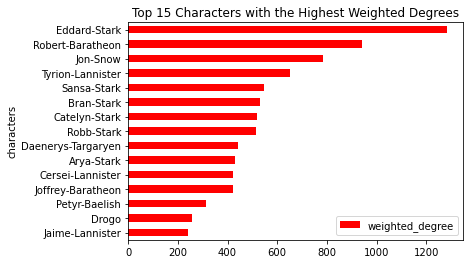

In [12]:
# First, make the weighted degree values a dictionary, and add it as a network attribute
# Then make a Pandas dataframe from the weighted degree data, and sort from highest to lowest
# Finally, plot the 15 (instead of 10) nodes with the highest weighted degree values, invert the y axis, 
# set color as red, and add reasonable title, xlabel, and ylabel

degrees = dict(networkx.degree(G, weight='weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=degrees)
degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
degree_df = degree_df.sort_values(by='weighted_degree', ascending=False)
degree_df[:15].plot(kind='barh', x='node', title='Top 15 Characters with the Highest Weighted Degrees', color = 'red', xlabel = 'characters', ylabel='weighted_degrees').invert_yaxis()



# Calculate Different Centrality Scores

Eigenvector centrality is a measure of the influence of a node in a network. High eigenvector score means that a node is connected to many nodes who themselves have high scores.

In [13]:
networkx.eigenvector_centrality(G)

{'Addam-Marbrand': 0.016906622875341313,
 'Jaime-Lannister': 0.1949579857603636,
 'Tywin-Lannister': 0.13939046584052586,
 'Aegon-I-Targaryen': 0.01738468087953347,
 'Daenerys-Targaryen': 0.047389349606780984,
 'Eddard-Stark': 0.29640893871843443,
 'Aemon-Targaryen-(Maester-Aemon)': 0.015728915590424563,
 'Alliser-Thorne': 0.0288464406191708,
 'Bowen-Marsh': 0.015169602126328249,
 'Chett': 0.010824124243907147,
 'Clydas': 0.0007954157740942034,
 'Jeor-Mormont': 0.05708614464400135,
 'Jon-Snow': 0.1704604493682857,
 'Samwell-Tarly': 0.02786296605781483,
 'Aerys-II-Targaryen': 0.048582634087231305,
 'Brandon-Stark': 0.04401847371679745,
 'Gerold-Hightower': 0.031231471653479868,
 'Jon-Arryn': 0.12467394372126446,
 'Robert-Baratheon': 0.2694880017758137,
 'Aggo': 0.005481130715564632,
 'Drogo': 0.02259083571954163,
 'Jhogo': 0.005712048672841408,
 'Jorah-Mormont': 0.024102672246267692,
 'Quaro': 0.004319920160802584,
 'Rakharo': 0.004263929104536286,
 'Albett': 0.010048162713271911,
 'Hal

In [14]:
# Add eigenvector_centrality (which is already a dictionary) as a network attribute
eigenvector_centrality = networkx.eigenvector_centrality(G)
networkx.set_node_attributes(G, name='eigenvector', values=eigenvector_centrality)

In [15]:
# Make a Pandas dataframe from the eigenvector centrality, then sort from highest to lowest
eigenvector_df = pd.DataFrame(G.nodes(data='eigenvector'), columns=['node', 'eigenvector'])
eigenvector_df = eigenvector_df.sort_values(by='eigenvector', ascending=False)
eigenvector_df

node  eigenvector
5                       Eddard-Stark     0.296409
18                  Robert-Baratheon     0.269488
54                       Sansa-Stark     0.231550
30                  Tyrion-Lannister     0.225204
44                 Joffrey-Baratheon     0.220754
40                  Cersei-Lannister     0.216433
39                     Catelyn-Stark     0.212550
49                     Petyr-Baelish     0.201464
1                    Jaime-Lannister     0.194958
38                        Bran-Stark     0.193772
51                        Robb-Stark     0.192536
36                        Arya-Stark     0.178483
12                          Jon-Snow     0.170460
62                   Renly-Baratheon     0.153229
66                             Varys     0.150443
33                       Jory-Cassel     0.144680
2                    Tywin-Lannister     0.139390
52                     Rodrik-Cassel     0.136396
53                    Sandor-Clegane     0.134586
17                         Jon-Arryn     0.124674
63                   Barristan-Selmy     0.123027
65                           Pycelle     0.122192
114                Stannis-Baratheon     0.109452
74                      Loras-Tyrell     0.107866
70                     Theon-Greyjoy     0.105633
46                           Mordane     0.103388
68                             Luwin     0.102550
73                    Gregor-Clegane     0.101384
97                        Lysa-Arryn     0.095296
50                      Rickon-Stark     0.091197
37                      Benjen-Stark     0.090674
42                        Ilyn-Payne     0.087017
113                      Janos-Slynt     0.078796
56                  Tommen-Baratheon     0.074441
45                       Meryn-Trant     0.073106
95                      Edmure-Tully     0.068068
94                     Brynden-Tully     0.066786
83                  Rickard-Karstark     0.065901
48                Myrcella-Baratheon     0.065459
11                      Jeor-Mormont     0.057086
34                            Tomard     0.056548
58                             Yoren     0.056039
57                       Vayon-Poole     0.055900
47                             Mycah     0.053690
129                Rhaegar-Targaryen     0.052138
72                  Beric-Dondarrion     0.051035
43                       Jeyne-Poole     0.049443
14                Aerys-II-Targaryen     0.048583
4                 Daenerys-Targaryen     0.047389
15                     Brandon-Stark     0.044018
64                      Boros-Blount     0.043733
87                             Bronn     0.043207
86                      Lyanna-Stark     0.042549
143                   Galbart-Glover     0.041151
77                     Hallis-Mollen     0.040809
79                            Hullen     0.040266
31                              Alyn     0.040124
103             Jon-Umber-(Greatjon)     0.039781
99                       Walder-Frey     0.036984
96                      Hoster-Tully     0.036013
93                       Willis-Wode     0.033655
89                         Marillion     0.032919
155                      Wyl-(guard)     0.032616
16                  Gerold-Hightower     0.031231
149                       Marq-Piper     0.030859
92                       Vardis-Egen     0.030626
7                     Alliser-Thorne     0.028846
60                     Balon-Greyjoy     0.028615
151                     Raymun-Darry     0.028615
169                  Kevan-Lannister     0.028294
13                     Samwell-Tarly     0.027863
55                       Syrio-Forel     0.027710
108                     Robert-Arryn     0.026954
32                            Harwin     0.026369
145            High-Septon-(fat_one)     0.026151
81                               Nan     0.026037
78                             Hodor     0.026037
112                             Cayn     0.025596
136                 Torrhen-Karstark     0.025547
82                              

Betweenness centrality is a measure of centrality in a graph based on shortest paths. The betweenness centrality for each node is the number of these shortest paths that pass through the node.

In [16]:
networkx.betweenness_centrality(G)

{'Addam-Marbrand': 0.0,
 'Jaime-Lannister': 0.0320095542681723,
 'Tywin-Lannister': 0.026190475931508066,
 'Aegon-I-Targaryen': 0.0,
 'Daenerys-Targaryen': 0.08627015537511595,
 'Eddard-Stark': 0.2696038913836117,
 'Aemon-Targaryen-(Maester-Aemon)': 0.010844715683425361,
 'Alliser-Thorne': 0.005026701469957172,
 'Bowen-Marsh': 0.0,
 'Chett': 0.0,
 'Clydas': 0.0,
 'Jeor-Mormont': 0.028345621007255038,
 'Jon-Snow': 0.17158135899829566,
 'Samwell-Tarly': 0.014449634885820021,
 'Aerys-II-Targaryen': 0.00048173749786653005,
 'Brandon-Stark': 0.002080261918971597,
 'Gerold-Hightower': 0.02144725370531822,
 'Jon-Arryn': 0.012525043642810938,
 'Robert-Baratheon': 0.21403028397371796,
 'Aggo': 7.265329845975008e-05,
 'Drogo': 0.06481224290874964,
 'Jhogo': 4.359197907585004e-05,
 'Jorah-Mormont': 0.012611106728154204,
 'Quaro': 2.906131938390003e-05,
 'Rakharo': 3.390487261455003e-05,
 'Albett': 0.0,
 'Halder': 0.0002102102102102102,
 'Rast': 7.749685169040008e-05,
 'Grenn': 0.00020246052504117

In [17]:
betweenness_centrality = networkx.betweenness_centrality(G)
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

node  betweenness
5                       Eddard-Stark     0.269604
18                  Robert-Baratheon     0.214030
30                  Tyrion-Lannister     0.190212
12                          Jon-Snow     0.171581
39                     Catelyn-Stark     0.151395
4                 Daenerys-Targaryen     0.086270
51                        Robb-Stark     0.072984
20                             Drogo     0.064812
38                        Bran-Stark     0.055800
54                       Sansa-Stark     0.037145
37                      Benjen-Stark     0.032933
99                       Walder-Frey     0.032339
1                    Jaime-Lannister     0.032010
11                      Jeor-Mormont     0.028346
40                  Cersei-Lannister     0.026435
2                    Tywin-Lannister     0.026190
74                      Loras-Tyrell     0.022410
91                            Shagga     0.021593
16                  Gerold-Hightower     0.021447
131                     Danwell-Frey     0.021389
95                      Edmure-Tully     0.019633
44                 Joffrey-Baratheon     0.018949
97                        Lysa-Arryn     0.018213
33                       Jory-Cassel     0.017525
36                        Arya-Stark     0.017495
13                     Samwell-Tarly     0.014450
68                             Luwin     0.013183
22                     Jorah-Mormont     0.012611
17                         Jon-Arryn     0.012525
6    Aemon-Targaryen-(Maester-Aemon)     0.010845
66                             Varys     0.010795
121                             Conn     0.010753
72                  Beric-Dondarrion     0.010753
140                              Ogo     0.010753
179                      Mace-Tyrell     0.010753
110                  Tytos-Blackwood     0.010753
67                     Jaremy-Rykker     0.010753
117                      Karyl-Vance     0.010753
70                     Theon-Greyjoy     0.009808
62                   Renly-Baratheon     0.009635
52                     Rodrik-Cassel     0.009634
83                  Rickard-Karstark     0.009474
49                     Petyr-Baelish     0.009437
71                      Waymar-Royce     0.006708
53                    Sandor-Clegane     0.006238
149                       Marq-Piper     0.006237
7                     Alliser-Thorne     0.005027
159                            Gared     0.004328
87                             Bronn     0.004125
94                     Brynden-Tully     0.003832
103             Jon-Umber-(Greatjon)     0.003324
73                    Gregor-Clegane     0.002924
130                Viserys-Targaryen     0.002858
129                Rhaegar-Targaryen     0.002820
15                     Brandon-Stark     0.002080
155                      Wyl-(guard)     0.001630
63                   Barristan-Selmy     0.001236
125                  Illyrio-Mopatis     0.001199
92                       Vardis-Egen     0.001188
46                           Mordane     0.001056
143                   Galbart-Glover     0.000871
45                       Meryn-Trant     0.000698
56                  Tommen-Baratheon     0.000555
14                Aerys-II-Targaryen     0.000482
79                            Hullen     0.000451
114                Stannis-Baratheon     0.000443
96                      Hoster-Tully     0.000391
93                       Willis-Wode     0.000388
65                           Pycelle     0.000321
42                        Ilyn-Payne     0.000320
32                            Harwin     0.000317
31                              Alyn     0.000315
34                            Tomard     0.000297
136                 Torrhen-Karstark     0.000272
58                             Yoren     0.000211
26                            Halder     0.000210
28                             Grenn     0.000202
55                       Syrio-Forel     0.000123
120                            Qotho     0.000116
126                             

Closeness centrality is calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [18]:
networkx.closeness_centrality(G)

{'Addam-Marbrand': 0.3234782608695652,
 'Jaime-Lannister': 0.46153846153846156,
 'Tywin-Lannister': 0.4492753623188406,
 'Aegon-I-Targaryen': 0.3765182186234818,
 'Daenerys-Targaryen': 0.40522875816993464,
 'Eddard-Stark': 0.5636363636363636,
 'Aemon-Targaryen-(Maester-Aemon)': 0.33695652173913043,
 'Alliser-Thorne': 0.36328125,
 'Bowen-Marsh': 0.33574007220216606,
 'Chett': 0.3333333333333333,
 'Clydas': 0.25237449118046135,
 'Jeor-Mormont': 0.4161073825503356,
 'Jon-Snow': 0.493368700265252,
 'Samwell-Tarly': 0.3576923076923077,
 'Aerys-II-Targaryen': 0.38589211618257263,
 'Brandon-Stark': 0.3803680981595092,
 'Gerold-Hightower': 0.3803680981595092,
 'Jon-Arryn': 0.4376470588235294,
 'Robert-Baratheon': 0.5454545454545454,
 'Aggo': 0.2929133858267717,
 'Drogo': 0.3795918367346939,
 'Jhogo': 0.2929133858267717,
 'Jorah-Mormont': 0.37424547283702214,
 'Quaro': 0.29245283018867924,
 'Rakharo': 0.29245283018867924,
 'Albett': 0.33214285714285713,
 'Halder': 0.33574007220216606,
 'Rast': 

In [29]:
closeness_centrality = networkx.closeness_centrality(G)
networkx.set_node_attributes(G, name='closeness', values=closeness_centrality)
closeness_df = pd.DataFrame(G.nodes(data='closeness'), columns=['node', 'closeness'])
closeness_df = closeness_df.sort_values(by='closeness', ascending=False)
closeness_df

node  closeness
5                       Eddard-Stark   0.563636
18                  Robert-Baratheon   0.545455
30                  Tyrion-Lannister   0.510989
39                     Catelyn-Stark   0.505435
51                        Robb-Stark   0.497326
12                          Jon-Snow   0.493369
54                       Sansa-Stark   0.489474
38                        Bran-Stark   0.486911
40                  Cersei-Lannister   0.484375
44                 Joffrey-Baratheon   0.480620
1                    Jaime-Lannister   0.461538
36                        Arya-Stark   0.458128
49                     Petyr-Baelish   0.457002
52                     Rodrik-Cassel   0.453659
70                     Theon-Greyjoy   0.450363
2                    Tywin-Lannister   0.449275
68                             Luwin   0.449275
66                             Varys   0.446043
50                      Rickon-Stark   0.439716
17                         Jon-Arryn   0.437647
33                       Jory-Cassel   0.436620
62                   Renly-Baratheon   0.434579
37                      Benjen-Stark   0.432558
97                        Lysa-Arryn   0.429561
73                    Gregor-Clegane   0.418919
11                      Jeor-Mormont   0.416107
53                    Sandor-Clegane   0.415179
46                           Mordane   0.406114
83                  Rickard-Karstark   0.406114
4                 Daenerys-Targaryen   0.405229
95                      Edmure-Tully   0.405229
114                Stannis-Baratheon   0.401728
129                Rhaegar-Targaryen   0.400000
74                      Loras-Tyrell   0.398287
65                           Pycelle   0.398287
63                   Barristan-Selmy   0.393235
56                  Tommen-Baratheon   0.393235
42                        Ilyn-Payne   0.386694
14                Aerys-II-Targaryen   0.385892
58                             Yoren   0.385093
94                     Brynden-Tully   0.384298
143                   Galbart-Glover   0.383505
72                  Beric-Dondarrion   0.383505
96                      Hoster-Tully   0.383505
113                      Janos-Slynt   0.382716
57                       Vayon-Poole   0.382716
31                              Alyn   0.380368
15                     Brandon-Stark   0.380368
16                  Gerold-Hightower   0.380368
86                      Lyanna-Stark   0.380368
20                             Drogo   0.379592
136                 Torrhen-Karstark   0.378049
151                     Raymun-Darry   0.376518
60                     Balon-Greyjoy   0.376518
3                  Aegon-I-Targaryen   0.376518
149                       Marq-Piper   0.375758
34                            Tomard   0.375000
22                     Jorah-Mormont   0.374245
47                             Mycah   0.372745
87                             Bronn   0.371257
130                Viserys-Targaryen   0.370518
55                       Syrio-Forel   0.369781
125                  Illyrio-Mopatis   0.369048
41                           Desmond   0.368317
45                       Meryn-Trant   0.367589
155                      Wyl-(guard)   0.367589
48                Myrcella-Baratheon   0.366142
145            High-Septon-(fat_one)   0.364706
43                       Jeyne-Poole   0.364706
32                            Harwin   0.364706
112                             Cayn   0.363281
7                     Alliser-Thorne   0.363281
93                       Willis-Wode   0.362573
89                         Marillion   0.361868
135                   Daryn-Hornwood   0.361868
150                          Porther   0.361165
152                       Tobho-Mott   0.361165
153                           Tregar   0.361165
156                            Wylla   0.361165
154                            Varly   0.361165
148                             Joss   0.361165
147                            Jacks   0.361165
144                           Gendry   0.361165


In [20]:
# Adding rank to the degree df
degree_df['degree_rank'] = range(1, len(degree_df) + 1)
degree_df

node  weighted_degree  degree_rank
5                       Eddard-Stark             1284            1
18                  Robert-Baratheon              941            2
12                          Jon-Snow              784            3
30                  Tyrion-Lannister              650            4
54                       Sansa-Stark              545            5
38                        Bran-Stark              531            6
39                     Catelyn-Stark              520            7
51                        Robb-Stark              516            8
4                 Daenerys-Targaryen              443            9
36                        Arya-Stark              430           10
40                  Cersei-Lannister              424           11
44                 Joffrey-Baratheon              422           12
49                     Petyr-Baelish              313           13
20                             Drogo              256           14
1                    Jaime-Lannister              241           15
66                             Varys              231           16
68                             Luwin              210           17
62                   Renly-Baratheon              186           18
2                    Tywin-Lannister              181           19
11                      Jeor-Mormont              181           20
17                         Jon-Arryn              169           21
22                     Jorah-Mormont              154           22
33                       Jory-Cassel              152           23
65                           Pycelle              150           24
13                     Samwell-Tarly              148           25
63                   Barristan-Selmy              143           26
46                           Mordane              141           27
97                        Lysa-Arryn              138           28
53                    Sandor-Clegane              135           29
70                     Theon-Greyjoy              133           30
52                     Rodrik-Cassel              124           31
87                             Bronn              109           32
29                             Pypar              107           33
114                Stannis-Baratheon              105           34
130                Viserys-Targaryen              105           35
37                      Benjen-Stark              104           36
50                      Rickon-Stark               98           37
28                             Grenn               85           38
126                             Irri               81           39
7                     Alliser-Thorne               80           40
74                      Loras-Tyrell               78           41
73                    Gregor-Clegane               74           42
6    Aemon-Targaryen-(Maester-Aemon)               74           43
125                  Illyrio-Mopatis               70           44
94                     Brynden-Tully               69           45
120                            Qotho               68           46
128                   Mirri-Maz-Duur               63           47
127                           Jhiqui               60           48
26                            Halder               56           49
48                Myrcella-Baratheon               54           50
43                       Jeyne-Poole               54           51
129                Rhaegar-Targaryen               53           52
78                             Hodor               52           53
123                           Doreah               51           54
47                             Mycah               50           55
95                      Edmure-Tully               48           56
83                  Rickard-Karstark               46           57
119                            Haggo               45           58
91                            Shagga               44           59
42          

# Task 2

In [50]:
# Referring to what we have done to the degree_df, add "eigenvector_rank" column to eigenvector_df, "betweenness_rank" column 
# to betweenness_df, and "closeness_rank" to closeness_df
# Then create an "all_rank_df" by merging degree_df, eigenvector_df, betweenness_df, and closeness_df
# (this can be done by merging two dataframes at a time)
# Finally, slice the columns so that the final ouput should only have 5 columns: node and four different ranks
pd.set_option('display.width', 1000) #Reference since I was having issues having all the columns being displayed at once https://pandas.pydata.org/docs/user_guide/options.html

eigenvector_df['eigenvector_rank'] = range(1, len(eigenvector_df) + 1)
betweenness_df['betweenness_rank'] = range(1, len(betweenness_df) + 1)
closeness_df['closeness_rank'] = range(1, len(closeness_df) + 1)

merge_df = pd.merge(degree_df, eigenvector_df)

merge_df = pd.merge(merge_df, betweenness_df)

merge_df = pd.merge(merge_df, closeness_df)

all_rank_df = merge_df[['node', 'degree_rank', 'betweenness_rank', 'eigenvector_rank', 'closeness_rank']]

print(all_rank_df)



                                node  degree_rank  betweenness_rank  eigenvector_rank  closeness_rank
0                       Eddard-Stark            1                 1                 1               1
1                   Robert-Baratheon            2                 2                 2               2
2                           Jon-Snow            3                 4                13               6
3                   Tyrion-Lannister            4                 3                 4               3
4                        Sansa-Stark            5                10                 3               7
5                         Bran-Stark            6                 9                10               8
6                      Catelyn-Stark            7                 5                 7               4
7                         Robb-Stark            8                 7                11               5
8                 Daenerys-Targaryen            9                 6               

# Task 3

Discuss the results of task 2 in the next cell. You have to discuss at least two characters based on their ranks in different centralities. For instance, character A ranks high in all types of centralities; this may be attributed to reason XXX. On the other hand, character B ranks high in centrality C but low in centrality D, which could be a result of reason YYY. To provide context, please refer to the definitions of each centrality (included above) to clarify their implications. If you are familiar with A Song of Ice and Fire (or the television series Game of Thrones), you can attempt to interpret these results by exploring how a character's ranks in these centralities relate to the plot. If you haven't, you can just speculate on potential reasons, such as this character might have close association with key figures, leading to a high eigenvector centrality rank, etc.

Answer:As someone who is vaguely knowledgable of Game of Thrones, I am familiar with Eddard Stark in the early seasons of the show/book. This can be attributed to him having the highest ranking in all relative stats. He is a central figure in his family and influential over the area he lives in, idk if its from being a king, or a warrior or just a nice guy but from what I remember he was well know and well liked. This shows in each one of the rankings as eigenvector shows he knew many other important figures, and betweeness shows that he was central in many interactions. Also his closeness ranking shows the closeness between different nodes in a system so when there is a connection it would make sense that it would be through Eddard Stark. A figure not as influential as Eddard Stark is the individual that ranks 101 Roose Bolton. What makes him not as central is that his key importance from my brief google search is only being the head of his house. Though this gives him more influence in the story over other minor characters it keeps him locked from say having a more central role in the story as many of his interactions and connections are locked into a niche of the story within his own family. He does know and interact with individuals outside of his family but only in limited forms unlike Eddard Stark. This makes sense as Bolton's highest rank is in Eigenvector as the head of his family he would also mingle and meet with other heads of other families. But his other rankings are lacking as Bolton isn't a figure you need to go through to know others which hurts his betweeness and closeness rankings.

# Communities

In [51]:
# Import the "community" module for network community detection
from networkx.algorithms import community

In [52]:
# Calculate communities with greedy_modularity_communities function, 
# which uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity
communities = community.greedy_modularity_communities(G)
communities

[frozenset({'Addam-Marbrand',
            'Bran-Stark',
            'Bronn',
            'Brynden-Tully',
            'Catelyn-Stark',
            'Chella',
            'Chiggen',
            'Colemon',
            'Donnel-Waynwood',
            'Edmure-Tully',
            'Eon-Hunter',
            'Galbart-Glover',
            'Gunthor-son-of-Gurn',
            'Hali',
            'Hallis-Mollen',
            'Harys-Swyft',
            'Heward',
            'Hodor',
            'Hoster-Tully',
            'Hullen',
            'Jaime-Lannister',
            'Jon-Umber-(Greatjon)',
            'Jonos-Bracken',
            'Jory-Cassel',
            'Joseth',
            'Jyck',
            'Kevan-Lannister',
            'Kurleket',
            'Leo-Lefford',
            'Luwin',
            'Lyn-Corbray',
            'Lysa-Arryn',
            'Maege-Mormont',
            'Marillion',
            'Masha-Heddle',
            'Mord',
            'Moreo-Tumitis',
            'Morrec',
    

In [53]:
# Make a dictionary by looping through the communities and, for each member of the community, adding their community number
modularity_class = {} # Create empty dictionary
count = 0
#Loop through each community in the network
for community in communities:
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = count
    count += 1
modularity_class

{'Shae': 0,
 'Nan': 0,
 'Nestor-Royce': 0,
 'Rodrik-Cassel': 0,
 'Catelyn-Stark': 0,
 'Harys-Swyft': 0,
 'Jonos-Bracken': 0,
 'Morrec': 0,
 'Tyrion-Lannister': 0,
 'Eon-Hunter': 0,
 'Jyck': 0,
 'Maege-Mormont': 0,
 'Theon-Greyjoy': 0,
 'Mord': 0,
 'Tytos-Blackwood': 0,
 'Lyn-Corbray': 0,
 'Kevan-Lannister': 0,
 'Hodor': 0,
 'Walder-Frey': 0,
 'Stevron-Frey': 0,
 'Rickard-Karstark': 0,
 'Leo-Lefford': 0,
 'Roose-Bolton': 0,
 'Marillion': 0,
 'Osha': 0,
 'Luwin': 0,
 'Jon-Umber-(Greatjon)': 0,
 'Hoster-Tully': 0,
 'Bronn': 0,
 'Vardis-Egen': 0,
 'Robb-Stark': 0,
 'Jory-Cassel': 0,
 'Edmure-Tully': 0,
 'Galbart-Glover': 0,
 'Bran-Stark': 0,
 'Wendel-Manderly': 0,
 'Gunthor-son-of-Gurn': 0,
 'Heward': 0,
 'Kurleket': 0,
 'Rickon-Stark': 0,
 'Jaime-Lannister': 0,
 'Lysa-Arryn': 0,
 'Donnel-Waynwood': 0,
 'Wyl-(guard)': 0,
 'Robert-Arryn': 0,
 'Chiggen': 0,
 'Mya-Stone': 0,
 'Hullen': 0,
 'Brynden-Tully': 0,
 'Addam-Marbrand': 0,
 'Moreo-Tumitis': 0,
 'Hali': 0,
 'Stiv': 0,
 'Hallis-Mollen':

In [54]:
# Add modularity class to the network as an attribute
networkx.set_node_attributes(G, modularity_class, 'modularity_class_b1')

In [55]:
# Make a Pandas dataframe from modularity class data
communities_df = pd.DataFrame(G.nodes(data='modularity_class_b1'), columns=['node', 'modularity_class_b1'])
communities_df = communities_df.sort_values(by='modularity_class_b1')
communities_df

node  modularity_class_b1
0                     Addam-Marbrand                    0
100                          Colemon                    0
99                       Walder-Frey                    0
98                      Nestor-Royce                    0
97                        Lysa-Arryn                    0
96                      Hoster-Tully                    0
95                      Edmure-Tully                    0
94                     Brynden-Tully                    0
92                       Vardis-Egen                    0
90                              Shae                    0
89                         Marillion                    0
101                  Donnel-Waynwood                    0
88                           Chiggen                    0
85                              Stiv                    0
83                  Rickard-Karstark                    0
82                              Osha                    0
81                               Nan                    0
80                            Joseth                    0
79                            Hullen                    0
78                             Hodor                    0
77                     Hallis-Mollen                    0
76                              Hali                    0
70                     Theon-Greyjoy                    0
87                             Bronn                    0
102                       Eon-Hunter                    0
103             Jon-Umber-(Greatjon)                    0
104                     Masha-Heddle                    0
183                             Mord                    0
180                      Lyn-Corbray                    0
178                      Leo-Lefford                    0
176                         Kurleket                    0
175                           Morrec                    0
174                             Jyck                    0
173                    Jonos-Bracken                    0
172                    Maege-Mormont                    0
169                  Kevan-Lannister                    0
165                           Heward                    0
164                      Harys-Swyft                    0
163              Gunthor-son-of-Gurn                    0
158                     Roose-Bolton                    0
155                      Wyl-(guard)                    0
143                   Galbart-Glover                    0
115                           Chella                    0
111                  Wendel-Manderly                    0
110                  Tytos-Blackwood                    0
109                     Stevron-Frey                    0
108                     Robert-Arryn                    0
107                   Mychel-Redfort                    0
106                        Mya-Stone                    0
105                    Moreo-Tumitis                    0
68                             Luwin                    0
52                     Rodrik-Cassel                    0
93                       Willis-Wode                    0
30                  Tyrion-Lannister                    0
51                        Robb-Stark                    0
39                     Catelyn-Stark                    0
38                        Bran-Stark                    0
50                      Rickon-Stark                    0
2                    Tywin-Lannister                    0
1                    Jaime-Lannister                    0
33                       Jory-Cassel                    0
44                 Joffrey-Baratheon                    1
43                       Jeyne-Poole                    1
42                        Ilyn-Payne                    1
40                  Cersei-Lannister                    1
36                        Arya-Stark                    1
53                    Sandor-Clegane                    1
181                   Paxter-Redwyne                    1
179                      Mace-

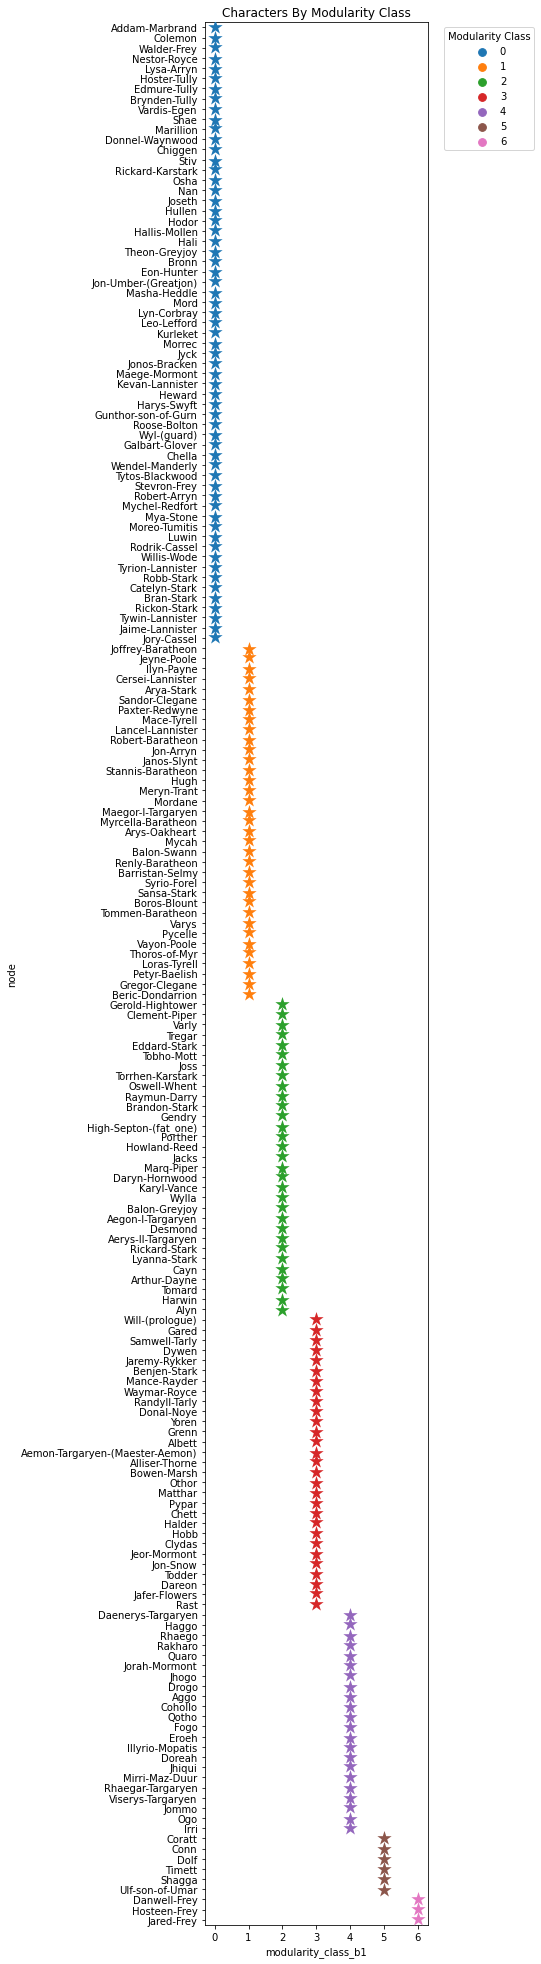

In [56]:
# Visualization: plot all characters with their modularity class indicated by a star in a seaborn stripplot
!pip install seaborn
import seaborn as sns
plt.figure(figsize=(4,35))

ax =sns.stripplot(x='modularity_class_b1', y='node', data=communities_df,
              hue='modularity_class_b1', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Characters By Modularity Class")
plt.show()

# Task 4

In [147]:
# Use the network data for the second book of A Song of Ice and Fire, and duplicate the process for creating the modularity
# of the first book and merge the results with the results of the first book
# First, you should create a network and use community.greedy_modularity_communities to generate the communities
# Then make a dictionary by looping through the communities and, for each member of the community, adding their community number
# Next, add modularity class to the network as an attribute and make a Pandas dataframe from modularity class data
# (remember to change column names to distinguish the modularity class of Book 2 and Book 1)
# Finally, merge the newly created dataframe for Book 2 and the communities_df for Book 1, and display the merged dataframe

from networkx.algorithms import community

asoiaf_b2_df = pd.read_csv('Data/asoiaf-book2-edges.csv')
G_b2 = nx.from_pandas_edgelist(asoiaf_b2_df, 'Source', 'Target', 'weight')

communities_b2 = community.greedy_modularity_communities(G_b2)

modularity_class_2 = {}
count = 0
for community in communities_b2:
    for name in community:
        modularity_class_2[name] = count
    count += 1

Book2 = pd.DataFrame(list(modularity_class_2.items()), columns=['Character', 'Modularity Class Book 2'])

Book1 = pd.read_csv('Data/asoiaf-book1-edges.csv')
Book1.rename(columns={'book': 'Modularity Class Book 1'}, inplace=True)
Book1.rename(columns={'Source': 'Character'}, inplace=True)

merged_df = pd.merge(Book1, Book2, on='Character', how='outer')


print(merged_df.head(150))

                           Character              Target        Type  weight  Modularity Class Book 1  Modularity Class Book 2
0                     Addam-Marbrand     Jaime-Lannister  Undirected     3.0                      1.0                      NaN
1                     Addam-Marbrand     Tywin-Lannister  Undirected     6.0                      1.0                      NaN
2                  Aegon-I-Targaryen  Daenerys-Targaryen  Undirected     5.0                      1.0                      6.0
3                  Aegon-I-Targaryen        Eddard-Stark  Undirected     4.0                      1.0                      6.0
4    Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected     4.0                      1.0                      3.0
5    Aemon-Targaryen-(Maester-Aemon)         Bowen-Marsh  Undirected     4.0                      1.0                      3.0
6    Aemon-Targaryen-(Maester-Aemon)               Chett  Undirected     9.0                      1.0          

# Task 5

Discuss the results of task 4 in the next cell. Compare the modularity classes between Book 1 and Book 2. It's important to note that the actual number of modularity classes itself may not hold significant meaning. For instance, if characters A and B are the only members of modularity class 0 in Book 1 and they are also the only members of modularity class 1 in Book 2, there is no substantive difference despite the differing class numbers.<br>You should discuss at least two pairs of characters. The first pair should belong to the same modularity class in both books, while the second pair should belong to the same modularity class in one book but belong to different modularity classes in the other (e.g., character A and B both belong to modularity class 0 in Book 1 and modularity class 1 in Book 2; whereas character C and D both belong to modularity class 2 in Book 1, but in Book 2, C is in modularity class 2 while D is in modularity class 3). If you are familiar with A Song of Ice and Fire (or the television series Game of Thrones), you can attempt to interpret these results by exploring how the consistency or inconsistency in characters' modularity classes relates to the plot. If you haven't, you can just speculate on potential reasons for the consistency or inconsistency.

In task 4 an example of a pair of individuals that had a change in modularity between books would be Aegon-I-Targaryen and Daenerys_Targaryan going from a 1 -> 6 between books. This may be explained by individuals from their families or individuals they both know being mentioned and introduced in the second book strengthening their modularity. An example of modularity staying the same between books would be Bran Stark and Stiv. This could be from the characters each one of these individuals know related to the plot hasn't changed much. To the point it hasn't effected their modularity class.